In [1]:
import numpy as np
import pandas as pd
from algorithms.double_subspace_coclustering import DWGKFDK, sigma2est
import pickle
import matplotlib.pyplot as plt

In [2]:
def standarlization(X):
    norm = lambda x: (x - np.mean(x))/(np.std(x))
    if type(X) == np.ndarray:
        X = pd.DataFrame(X)
    X_scale = X.apply(norm, axis=0)
    X_scale = X_scale.fillna(0)
    return X_scale

def numerical_class(y):
    return np.unique(y, return_inverse=True)[1]

def load_datasets(path):
    with open(path, 'rb') as f:
        info = pickle.load(f)
    return info

In [3]:
X, y,_ = load_datasets('datasets/wdbc')
X = standarlization(X)
y = numerical_class(y)
n_classes = len(np.unique(y))

sig2 = sigma2est(X)
sig2

np.float64(1.2820156037366874)

In [4]:
rs = DWGKFDK(K=n_classes, H=n_classes, m=1.01, n=1.007, sigma2=sig2, n_init=100).fit(X, random_state=10)

/home/ze_nataniel/Área de trabalho/FUZZ-IEEE GITHUB/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [6]:
# Prototypes
rs.G

array([[-0.57142434, -0.45466633],
       [ 0.76117705,  0.20686238]])

In [7]:
# Weights of the objects
rs.object_weights

array([ 0.1941961 ,  0.51437829,  0.55836196,  0.22869162,  0.5080617 ,
        0.49510813,  1.13260874,  0.72403519,  0.48625347,  0.24939923,
        0.72892921,  1.6684035 ,  0.24978762,  0.67693033,  0.34375785,
        0.56995359,  0.80394077,  1.04580323,  0.35509897,  1.76349845,
        1.73298992,  1.17968281,  0.48901615,  0.33888461,  0.49290646,
        0.32354746,  0.53789599,  0.71678968,  0.98816162,  1.47129936,
        0.49137147,  0.4862214 ,  1.03462974,  0.6722768 ,  1.07794368,
        1.83624243,  0.94507783,  1.31863919,  0.36222871,  0.59399099,
        1.85521039,  0.71594326,  0.23351073,  0.82170389,  0.7539759 ,
        0.68579696,  0.84835829,  0.57248548,  3.18682367,  2.17178127,
        1.99141601,  2.71502489,  3.61903343,  0.77643342,  0.91790587,
        2.28727246,  0.55992307,  1.22590365,  1.17143774,  0.68970734,
        0.6341043 ,  0.6278627 ,  0.47922751,  0.55889857,  0.83114221,
        1.16308867,  0.90201274,  2.93491854,  0.24113691,  3.02

In [8]:
# Weights of the variables
rs.variable_weights

array([1.18556414, 0.50210845, 1.29694288, 1.47672276, 0.50309986,
       1.10603499, 1.7949869 , 1.7883297 , 0.55357186, 0.62516637,
       1.45086747, 0.5009319 , 1.6358441 , 2.78078667, 0.6013805 ,
       1.02258702, 1.48839528, 0.87884671, 0.60938951, 1.14341202,
       1.4776425 , 0.46974222, 1.61738072, 1.8677666 , 0.51840785,
       1.03825756, 1.16880103, 1.20366553, 0.61844174, 0.77978621])

In [9]:
# Partition of the objects
rs.U

array([[6.93917818e-19, 1.00000000e+00],
       [3.20529113e-26, 1.00000000e+00],
       [1.00762156e-51, 1.00000000e+00],
       ...,
       [8.77722244e-40, 1.00000000e+00],
       [1.70241159e-21, 1.00000000e+00],
       [1.00000000e+00, 1.63553947e-44]], shape=(569, 2))

In [10]:
# Partition of the variables
rs.V

array([[1.00000000e+00, 4.46029293e-12],
       [1.09829932e-03, 9.98901701e-01],
       [1.00000000e+00, 9.16469768e-15],
       [1.00000000e+00, 4.11295932e-10],
       [1.46399282e-03, 9.98536007e-01],
       [1.00000000e+00, 4.59533227e-10],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [7.16264799e-05, 9.99928374e-01],
       [6.16243005e-14, 1.00000000e+00],
       [1.03495783e-06, 9.99998965e-01],
       [7.12159848e-13, 1.00000000e+00],
       [1.21530354e-09, 9.99999999e-01],
       [0.00000000e+00, 1.00000000e+00],
       [7.12881462e-16, 1.00000000e+00],
       [7.07121526e-10, 9.99999999e-01],
       [5.59482909e-20, 1.00000000e+00],
       [3.40696808e-03, 9.96593032e-01],
       [4.81871597e-17, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.13675609e-18],
       [3.96256009e-03, 9.96037440e-01],
       [1.00000000e+00, 5.59418361e-21],
       [1.00000000e+00, 1.40830118e-13],
       [8.307543

In [12]:
# Number of iterations untill convergence
rs.iterations

27

In [13]:
# Final value of the objective function
rs.J

np.float64(3948.1332691375364)

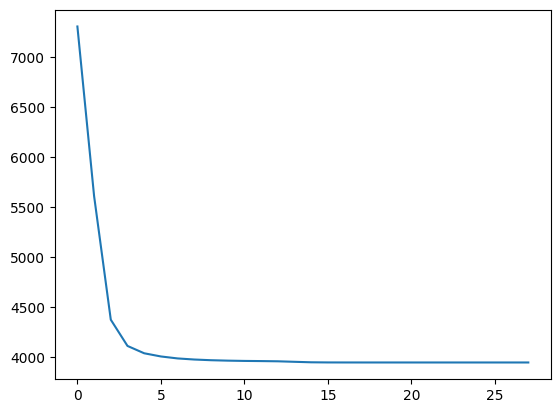

In [ ]:
# Values of the objective function during the co-clustering process
plt.plot(rs.Jlist)